In [3]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
import yfinance as yf
import pandas as pd

start = '2015-01-01'
end = '2025-01-01'

# Download data using yfinance
df = yf.download('AAPL', start=start, end=end)

df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320429,24.789798,23.879978,24.778675,212818400
2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500
2024-12-31,250.144974,253.001833,249.156056,252.162760,39480700


In [6]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.320429,24.789798,23.879978,24.778675,212818400
1,2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2,2015-01-06,23.637510,23.897776,23.274916,23.699796,263188400
3,2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
4,2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000


In [7]:
df = df.drop(['Date'] , axis=1)
df.head()

<ipython-input-7-15295be23f80>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'] , axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320429,24.789798,23.879978,24.778675,212818400
1,23.635292,24.169172,23.448435,24.089090,257142000
2,23.637510,23.897776,23.274916,23.699796,263188400
3,23.968960,24.069062,23.735387,23.846612,160423600
4,24.889906,24.947743,24.180291,24.298190,237458000


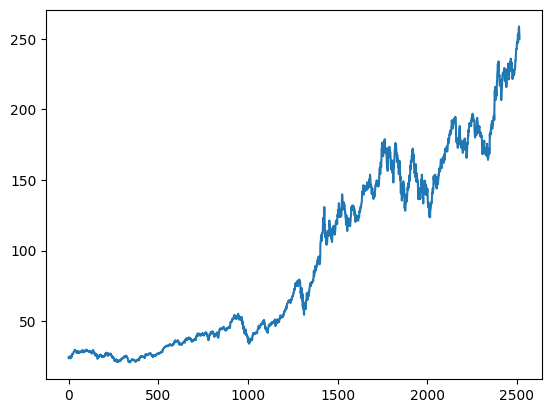

In [8]:
  plt.plot(df.Close)

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320429,24.789798,23.879978,24.778675,212818400
1,23.635292,24.169172,23.448435,24.089090,257142000
2,23.637510,23.897776,23.274916,23.699796,263188400
3,23.968960,24.069062,23.735387,23.846612,160423600
4,24.889906,24.947743,24.180291,24.298190,237458000
...,...,...,...,...,...
2511,257.916443,257.926411,255.009620,255.209412,23234700
2512,258.735504,259.814335,257.347047,257.906429,27237100
2513,255.309296,258.415896,252.782075,257.546826,42355300


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,229.357535
2512,229.859200
2513,230.346935
2514,230.774993


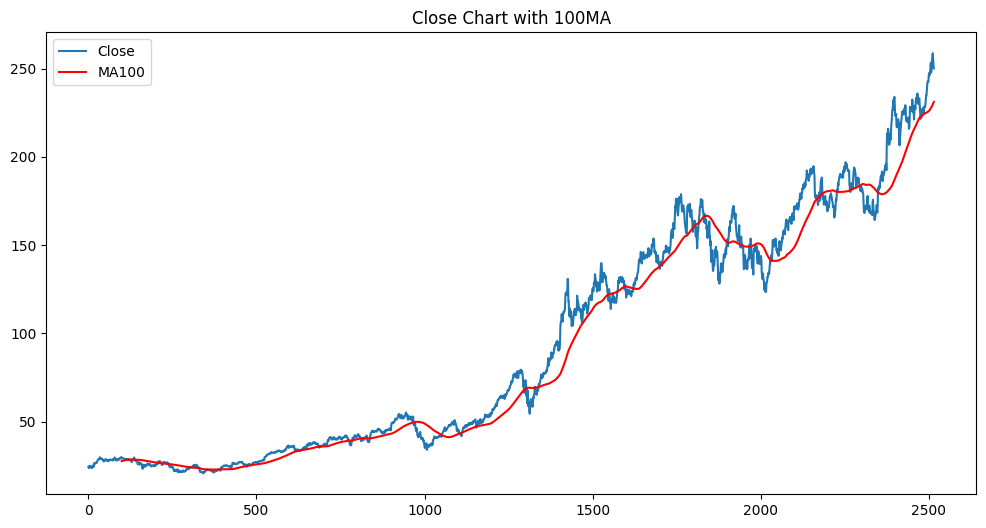

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label='Close')
plt.plot(ma100, 'r', label='MA100')
plt.title("Close Chart with 100MA")
plt.legend()
plt.show()


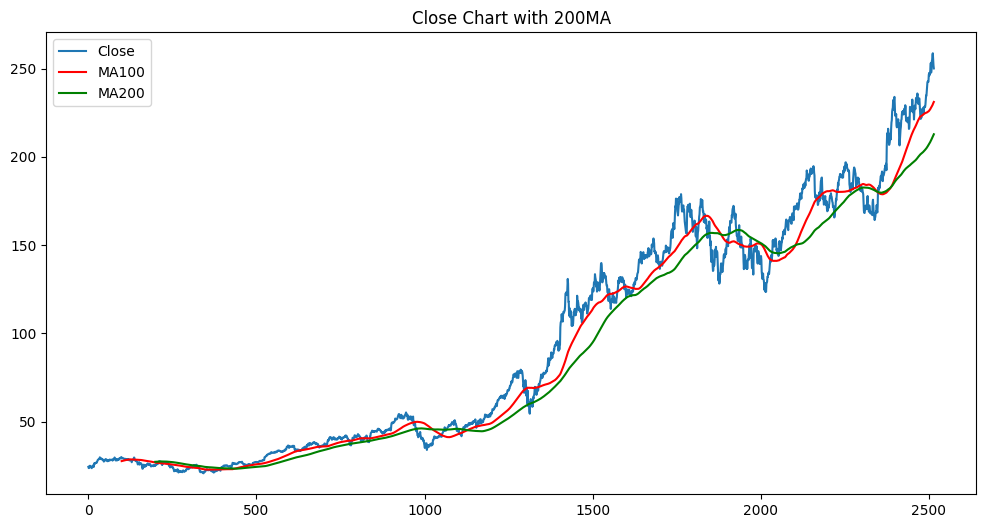

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

plt.figure(figsize=(12, 6))
plt.plot(df.Close, label='Close')
plt.plot(ma100, 'r', label='MA100')
plt.plot(ma200, 'g', label='MA200')
plt.title("Close Chart with 200MA")
plt.legend()
plt.show()

In [13]:
df.shape

(2516, 5)

In [14]:

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [15]:
data_training.head()

Ticker,AAPL
0,24.320429
1,23.635292
2,23.637510
3,23.968960
4,24.889906


In [16]:
data_testing.head()

Ticker,AAPL
1761,175.135422
1762,174.516312
1763,178.879913
1764,176.609634
1765,171.911850


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array
# data_training_array.shape

array([[0.02328839],
       [0.01891204],
       [0.01892621],
       ...,
       [1.        ],
       [0.99347111],
       [0.99403632]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1661, 100, 1)

In [21]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - loss: 0.0692
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0064
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0043
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0040
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0041
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0040
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0039
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0043
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0039
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0036
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0044
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0038
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0040
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0035
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0029
Ep

In [25]:
model.save('Keras_model.h5')

In [27]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

Ticker,AAPL
0,143.368393
1,142.887543
2,143.142700
3,146.116226
4,146.322311


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.46392512e-01],
       [1.42834676e-01],
       [1.44722600e-01],
       [1.66723879e-01],
       [1.68248715e-01],
       [1.82916535e-01],
       [1.76163499e-01],
       [1.48353144e-01],
       [1.50821942e-01],
       [1.61641320e-01],
       [1.72678257e-01],
       [1.72024675e-01],
       [1.62875662e-01],
       [1.56921284e-01],
       [1.64618283e-01],
       [1.97438827e-01],
       [1.88072029e-01],
       [1.93009624e-01],
       [2.01287496e-01],
       [2.06007080e-01],
       [2.23361709e-01],
       [2.11888637e-01],
       [2.04337054e-01],
       [1.67304753e-01],
       [1.71516397e-01],
       [1.61133041e-01],
       [1.67740436e-01],
       [1.65997589e-01],
       [1.46174614e-01],
       [1.23519866e-01],
       [1.27077703e-01],
       [1.44649892e-01],
       [1.51766017e-01],
       [1.52419485e-01],
       [1.41164424e-01],
       [1.16040653e-01],
       [1.22721094e-01],
       [1.13063464e-01],
       [1.21413931e-01],
       [9.59270712e-02],


In [29]:
input_data.shape

(855, 1)

In [32]:
x_test =[]
y_test = []

for i in range(100 , input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [33]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [34]:
#making prediction
y_predicted = model.predict(x_test)
y_predicted.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


(755, 1)

In [35]:
#now scale up again
scaler.scale_

array([0.00739905])

In [36]:
scale_factor = 1/0.00739905
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

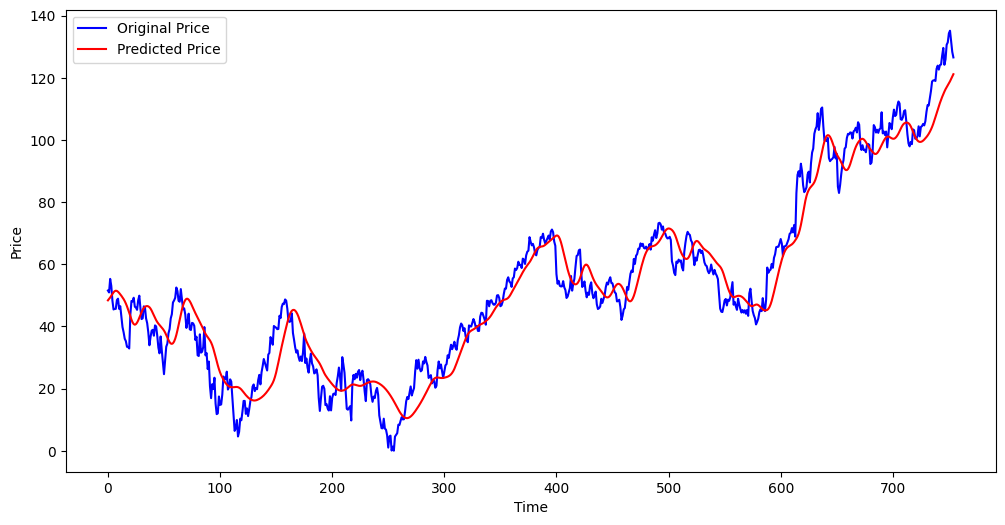

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()